### Modern Portfolio Management Using Capital Asset Pricing And Fama-French Three Factor Model

In [ ]:
# import needed modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
# Change these values based on the # of stocks in each basket ( Sensex/ Large CAP) Mid cap

sensex_no_of_stocks  = 20
largecap_no_of_stocks = 5
midcap_no_of_stocks = 5


In [2]:
# Create sensex symbols from NSE website.
stocks_sensex = ["^NSEI","AXISBANK.NS", "BANKBARODA.NS", "BHEL.NS", "BPCL.NS","BHARTIARTL.NS", "BOSCHLTD.NS", "CIPLA.NS",
                    "DRREDDY.NS", "GAIL.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS","HEROMOTOCO.NS", "HINDALCO.NS", 
                    "HINDUNILVR.NS", "HDB.NS", "ITC.NS","ICICIBANK.NS", "IDEA.NS", "INDUSINDBK.NS", "INFY.NS", 
                    "KOTAKBANK.NS","LT.NS","LUPIN.NS","M&M.NS","MARUTI.NS","NTPC.NS","ONGC.NS","POWERGRID.NS","PNB.NS",
                    "RELIANCE.NS","SBIN.NS","SUNPHARMA.NS","TCS.NS","TATAMOTORS.NS","TATAPOWER.NS","TATASTEEL.NS","TECHM.NS",
                    "ULTRACEMCO.NS","VEDL.NS","WIPRO.NS","YESBANK.NS","ZEEL.NS"]


In [3]:
# Create mid cap symbols from NSE website.
mid_cap= ["^NSEI","ADANIENT.NS","ADANIPOWER.NS","AJANTPHARM.NS","AMARAJABAT.NS","APOLLOHOSP.NS",
                   "APOLLOTYRE.NS","ARVIND.NS","BANKINDIA.NS","BERGEPAINT.NS","BHARATFORG.NS","BIOCON.NS",
                   "CESC.NS","CANBK.NS","CASTROLIND.NS","CENTURYTEX.NS","DALMIABHA.NS","DISHTV.NS",
                   "DIVISLAB.NS","ENGINERSIN.NS","EXIDEIND.NS","FEDERALBNK.NS","GMRINFRA.NS",
                   "GODREJIND.NS","IDBI.NS","IDFCFIRSTB.NS","IDFC.NS","IRB.NS","IGL.NS","JINDALSTEL.NS",
                   "L&TFH.NS","M&MFIN.NS","MRPL.NS","MINDTREE.NS","MUTHOOTFIN.NS","NBCC.NS",
                   "PCJEWELLER.NS","PAGEIND.NS","RBLBANK.NS","RCOM.NS","RELINFRA.NS","RPOWER.NS","SRF.NS",
                   "STAR.NS","TVSMOTOR.NS","TATACHEM.NS","TATACOMM.NS","TATAGLOBAL.NS","UNIONBANK.NS",
                   "UBL.NS","VOLTAS.NS"]


In [4]:
# create large cap symbols from NSE Website
large_cap = ["^NSEI","ADVENZYMES.NS", "AEGISCHEM.NS", "ALBK.NS", "ANDHRABANK.NS", "ASHOKA.NS", "ATUL.NS",
                    "AVANTIFEED.NS", "BEML.NS", "BSE.NS", "BAJAJELEC.NS", "BALRAMCHIN.NS","BBTC.NS", 
                    "CARERATING.NS", "CGPOWER.NS", "CANFINHOME.NS", "CAPF.NS", "CEATLTD.NS", "CENTURYPLY.NS",
                    "CHAMBLFERT.NS", "CHENNPETRO.NS", "COX&KINGS.NS", "DCBBANK.NS", "DELTACORP.NS",
                    "DENABANK.NS", "DBL.NS", "EIDPARRY.NS", "EQUITAS.NS", "ESCORTS.NS", "FSL.NS", "FCONSUMER.NS",
                    "FLFL.NS", "GDL.NS", "GODFRYPHLP.NS", "GRANULES.NS", "GMDCLTD.NS", 
                    "GSFC.NS", "HIMATSEIDE.NS", "HCC.NS", "HDIL.NS", "IFCI.NS", "ITI.NS", "INDIACEM.NS",
                    "ITDC.NS", "IBREALEST.NS", "IBVENTURES.NS","ICIL.NS", "INFIBEAM.NS", "INOXWIND.NS",
                    "JKLAKSHMI.NS","JKTYRE.NS", "JISLJALEQS.NS", "JPASSOCIAT.NS", "J&KBANK.NS", 
                    "JETAIRWAYS.NS", "JUSTDIAL.NS", "KALPATPOWR.NS","KTKBANK.NS", "KSCL.NS", "KEC.NS", 
                    "KWALITY.NS", "LAXMIMACH.NS","LAKSHVILAS.NS", "LAURUSLABS.NS", "MMTC.NS", "MOIL.NS",
                    "MANPASAND.NS","MONSANTO.NS", "NCC.NS", "NIITTECH.NS", "NFL.NS", "NAVKARCORP.NS", 
                    "OMAXE.NS", "ORIENTBANK.NS", "PNCINFRA.NS", "PTC.NS", "PVR.NS", "PERSISTENT.NS", 
                    "RAIN.NS", "RALLIS.NS", "RCF.NS", "RAYMOND.NS", "RNAVAL.NS", "REPCOHOME.NS",
                    "RUPA.NS", "SHK.NS", "SREINFRA.NS", "SCHNEIDER.NS", "SCI.NS", "SOBHA.NS", "SOUTHBANK.NS", 
                    "STRTECH.NS", "SWANENERGY.NS","TATAELXSI.NS", "TIMKEN.NS", "TRIDENT.NS", "UCOBANK.NS", 
                    "UJJIVAN.NS", "VRLLOG.NS", "WABAG.NS"]

In [78]:

# Start time and end time for run, change these paremeters if required for different run intervals.
start_time = pd.to_datetime('2014-04-02')
end_time = pd.to_datetime('2018-03-31') 

In [91]:
# This function takes a list of stccks and returns an dataframe back in sorted formatof either volatility or Beta
#the strategy assumes we will use BETA for Sensex and Large Cap strocks and Volatility for Mid cap. The startagey can
# also be tweaked for taking small cap stocks as well.
# Assumes 60% Sensex rest Large cap and Mid Cap.

def calculate_params(stock_list, calc_type, start_remove, end_remove):
    ## REOLACE The Symbol list for the data set you are running
    yf.pdr_override()
    
        
    ## load prices for the stocks mentioned, into a pandas panel.
    i=0
    stock_prices_large_cap = yf.download(stock_list,start_remove,end_remove)
    My_Portfolio= stock_prices_large_cap['Close'] # load all the closing prices this will be retirned as a pandas dataframwe.
    My_Portfolio2 = My_Portfolio.sort_index(ascending = True) # as the prices are in descending order
    # resample and hold the values by momth only.
    My_Portfolio_Monthly = My_Portfolio.asfreq('M', method='ffill')

    #Code to compute teh percentage change from month to month as the values are monthly 

    My_Portfolio_Monthly_Chg = My_Portfolio_Monthly.pct_change().fillna(0)
    My_Portfolio_Monthly_Chg=My_Portfolio_Monthly_Chg[1:]
    k2=pd.DataFrame(columns =['SYMBOL','BETA','ALPHA'],index=stock_list)
    if (calc_type == 'BETA'):    
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            My_Portfolio_Monthly_Chg['BETA_'+ val] = My_Portfolio_Monthly_Chg[val].rolling(window=6).cov(My_Portfolio_Monthly_Chg['^NSEI']) / My_Portfolio_Monthly_Chg['^NSEI'].rolling(window=6).var()
    
    if (calc_type == 'VOL'):
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            My_Portfolio_Monthly_Chg['VOL_'+ val] = My_Portfolio_Monthly_Chg[val].rolling(window = 6).std()*np.sqrt(125) 


    #for idx, val in enumerate(stocks_large_cap[1:]): #create values to iterate over this so that we have clarity.
    #   My_Portfolio_Monthly_Chg['ALPHA_'+ val] = pd.rolling_mean(My_Portfolio_Monthly_Chg[val], My_Portfolio_Monthly_Chg['^NSEI'], window=6) / pd.rolling_var(My_Portfolio_Monthly_Chg['^NSEI'], window=6)
    #pd.rolling_apply(My_Portfolio_Monthly_Chg['BETA_'+val],win,gettail)

    if (calc_type == 'VOL'):
        Volatility = My_Portfolio_Monthly_Chg.copy()
        del Volatility['^NSEI']

    if (calc_type == 'VOL'):
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            del Volatility[val]
            #del Volatility['BETA_'+val]
            #del My_Portfolio_Monthly_Chg['ALPHA_'+val]
    
    
    if (calc_type == 'BETA'):
        Beta = My_Portfolio_Monthly_Chg.copy()
        del Beta['^NSEI']
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            del Beta[val]
            #del Beta['VOL_'+val]

    
    #del My_Portfolio_Monthly_Chg['ALPHA_'+val]

    if (calc_type == 'BETA'):
        Beta = Beta.tail(1)
        # Transpose
        Betas = Beta.T
        Betas.index.names= ['SYMBOL']

        #Betas.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
        Betas.columns= ['BETA']

        betas = Betas.sort_values(ascending= False,by='BETA')  
        return betas,My_Portfolio_Monthly_Chg.dropna()
    
    
    if (calc_type == 'VOL'):
        Vol = Volatility.tail(1)
        # Transpose
        Vols = Vol.T
        Vols.index.names= ['SYMBOL']
        #Betas.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
        Vols.columns= ['VOLATILITY']
        Vols = Vols.sort_values(ascending= False,by='VOLATILITY')
        return Vols,My_Portfolio_Monthly_Chg.dropna()


In [92]:

# Computes the either volatility or betas for various stocks usbing the above function.

# sensex stocks
Beta1,PortfolioS = calculate_params(stocks_sensex, 'BETA', start_time, end_time)
# large cap
betas,PortfolioB = calculate_params(large_cap, 'BETA', start_time, end_time)
#mid cap
Vols,PortfolioV = calculate_params(mid_cap, 'VOL', start_time, end_time)
print("BETA  Large Cap  STOCKS")
print(betas)
print("BETAS For Sensex Stocks")
print(Beta1)
print("Volatility for  Mid Cap  Stocks")
print("Volatility=",Vols)

[*********************100%***********************]  44 of 44 completed

1 Failed download:
- HDFC.NS: No data found for this date range, symbol may be delisted
[*********************100%***********************]  100 of 100 completed

13 Failed downloads:
- KALPATPOWR.NS: No timezone found, symbol may be delisted
- KWALITY.NS: No timezone found, symbol may be delisted
- MONSANTO.NS: No timezone found, symbol may be delisted
- STRTECH.NS: No timezone found, symbol may be delisted
- GDL.NS: No timezone found, symbol may be delisted
- LAKSHVILAS.NS: No timezone found, symbol may be delisted
- ORIENTBANK.NS: No timezone found, symbol may be delisted
- NIITTECH.NS: No timezone found, symbol may be delisted
- IBVENTURES.NS: No timezone found, symbol may be delisted
- DENABANK.NS: No timezone found, symbol may be delisted
- ALBK.NS: No timezone found, symbol may be delisted
- PVR.NS: No timezone found, symbol may be delisted
- ANDHRABANK.NS: No timezone found, symbol may be delisted
[*********

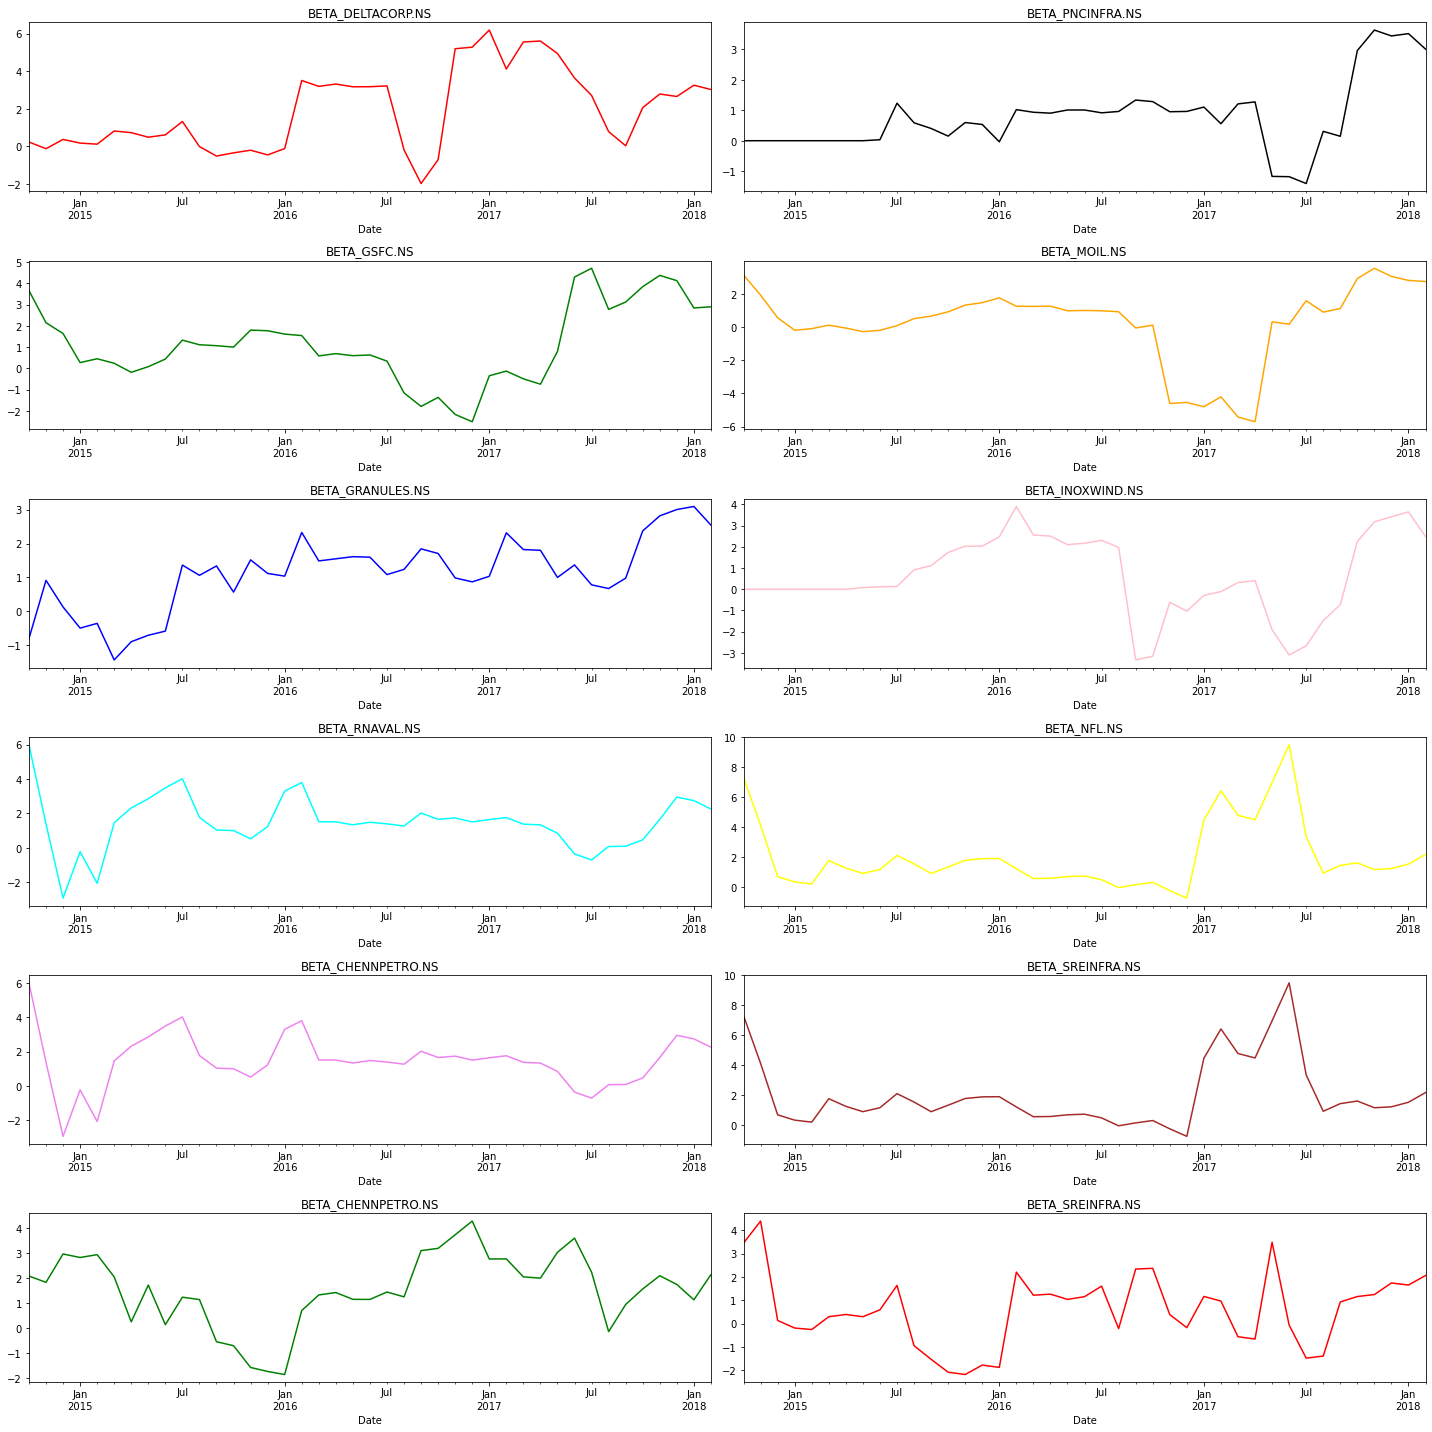

In [93]:
##################### DRAW THE BETAS OF TOP 10 ############################################################
fig, axes = plt.subplots(nrows=6, ncols=2,figsize = (20,20))
PortfolioB[betas.index[0]].plot(ax=axes[0,0],color='red');axes[0,0].set_title(betas.index[0])
PortfolioB[betas.index[1]].plot(ax=axes[0,1],color='black');axes[0,1].set_title(betas.index[1])
PortfolioB[betas.index[2]].plot(ax=axes[1,0],color='green');axes[1,0].set_title(betas.index[2])
PortfolioB[betas.index[3]].plot(ax=axes[1,1],color='orange');axes[1,1].set_title(betas.index[3])
PortfolioB[betas.index[4]].plot(ax=axes[2,0],color='blue');axes[2,0].set_title(betas.index[4])
PortfolioB[betas.index[5]].plot(ax=axes[2,1],color='pink'); axes[2,1].set_title(betas.index[5])
PortfolioB[betas.index[6]].plot(ax=axes[3,0],color='cyan'); axes[3,0].set_title(betas.index[6])
PortfolioB[betas.index[7]].plot(ax=axes[3,1],color='yellow'); axes[3,1].set_title(betas.index[7])
PortfolioB[betas.index[6]].plot(ax=axes[4,0],color='violet'); axes[4,0].set_title(betas.index[8])
PortfolioB[betas.index[7]].plot(ax=axes[4,1],color='brown'); axes[4,1].set_title(betas.index[9])
PortfolioB[betas.index[8]].plot(ax=axes[5,0],color='green'); axes[5,0].set_title(betas.index[8])
PortfolioB[betas.index[9]].plot(ax=axes[5,1],color='red'); axes[5,1].set_title(betas.index[9])
fig.tight_layout()

plt.show()

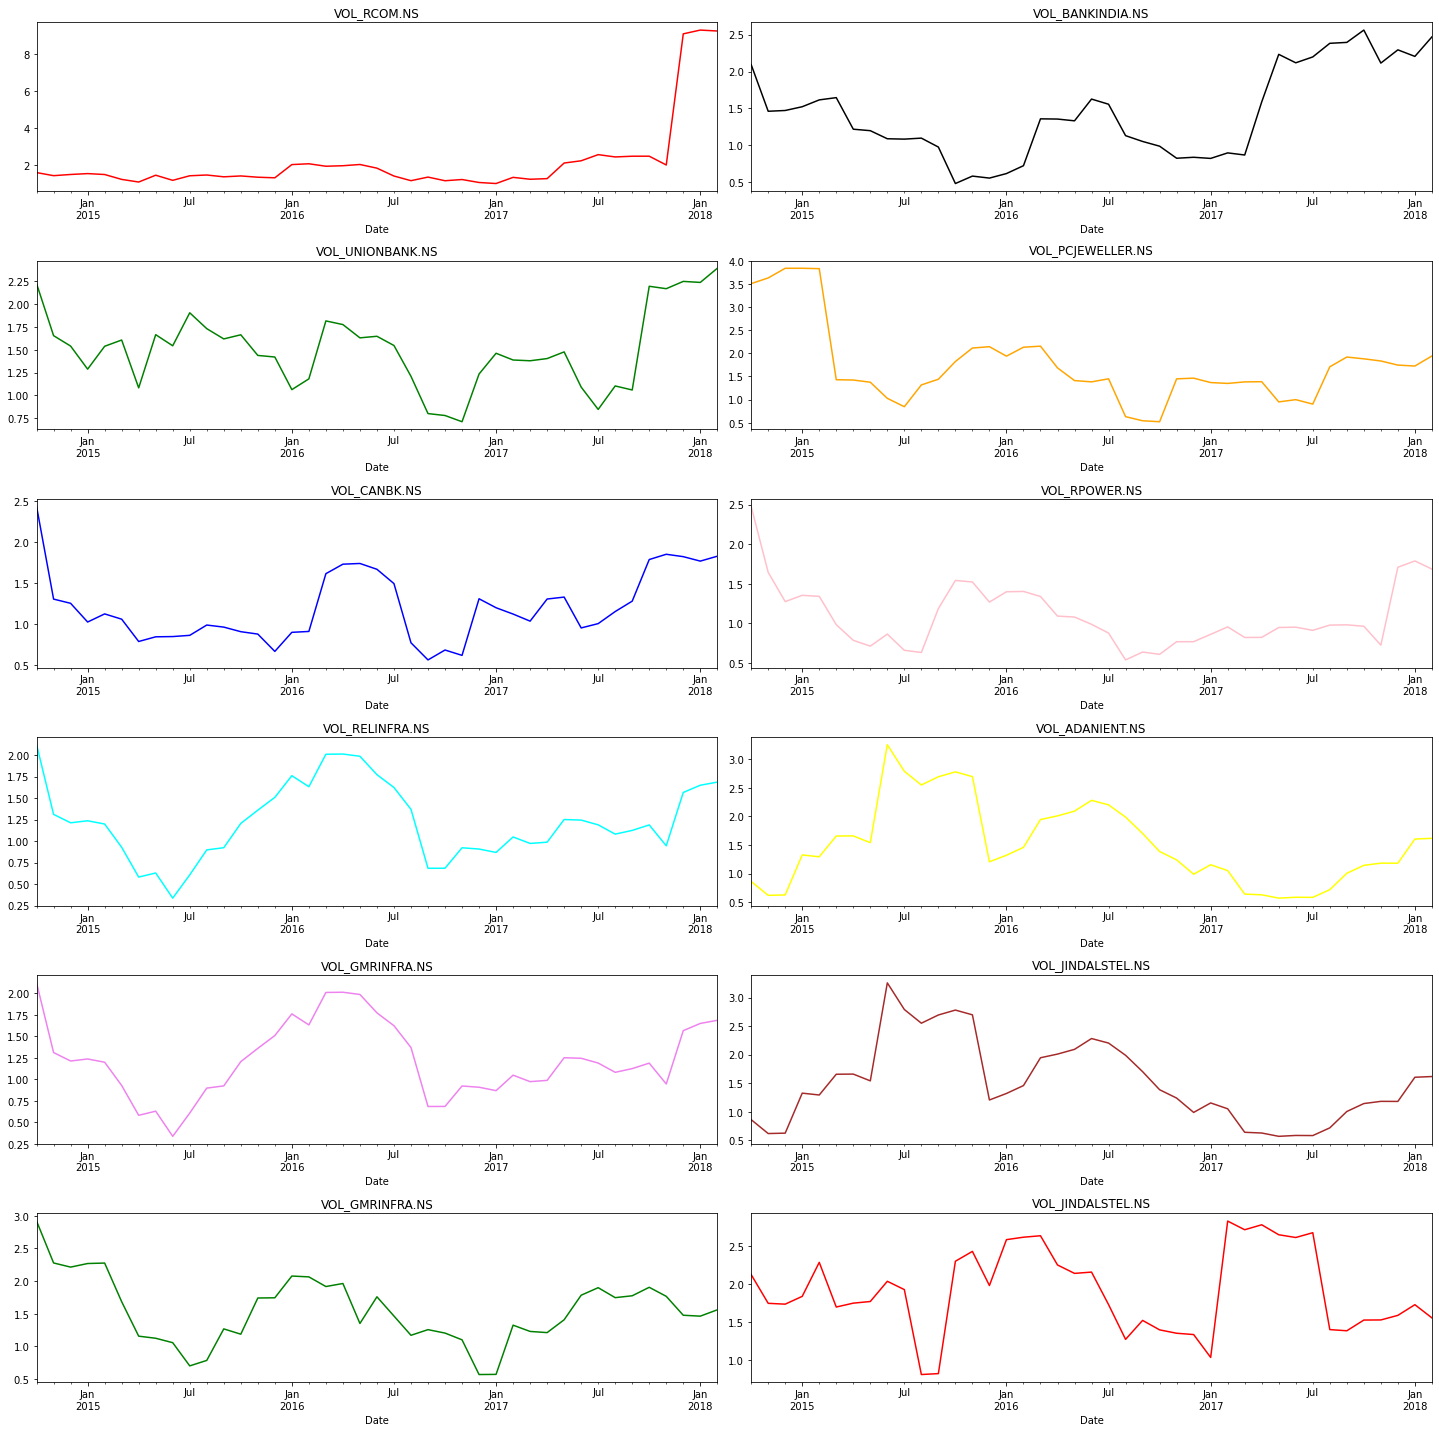

In [94]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize = (20,20))
PortfolioV[Vols.index[0]].plot(ax=axes[0,0],color='red');axes[0,0].set_title(Vols.index[0])
PortfolioV[Vols.index[1]].plot(ax=axes[0,1],color='black');axes[0,1].set_title(Vols.index[1])
PortfolioV[Vols.index[2]].plot(ax=axes[1,0],color='green');axes[1,0].set_title(Vols.index[2])
PortfolioV[Vols.index[3]].plot(ax=axes[1,1],color='orange');axes[1,1].set_title(Vols.index[3])
PortfolioV[Vols.index[4]].plot(ax=axes[2,0],color='blue');axes[2,0].set_title(Vols.index[4])
PortfolioV[Vols.index[5]].plot(ax=axes[2,1],color='pink'); axes[2,1].set_title(Vols.index[5])
PortfolioV[Vols.index[6]].plot(ax=axes[3,0],color='cyan'); axes[3,0].set_title(Vols.index[6])
PortfolioV[Vols.index[7]].plot(ax=axes[3,1],color='yellow'); axes[3,1].set_title(Vols.index[7])
PortfolioV[Vols.index[6]].plot(ax=axes[4,0],color='violet'); axes[4,0].set_title(Vols.index[8])
PortfolioV[Vols.index[7]].plot(ax=axes[4,1],color='brown'); axes[4,1].set_title(Vols.index[9])
PortfolioV[Vols.index[8]].plot(ax=axes[5,0],color='green'); axes[5,0].set_title(Vols.index[8])
PortfolioV[Vols.index[9]].plot(ax=axes[5,1],color='red'); axes[5,1].set_title(Vols.index[9])
fig.tight_layout()

plt.show()

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr




selected =[]

for i in range(midcap_no_of_stocks):
    selected.append(Vols.index[i][4:])

for i in range(largecap_no_of_stocks):
    selected.append(betas.index[i][5:])
    
for i in range(sensex_no_of_stocks):
    selected.append(Beta1.index[i][5:])
selected

['RCOM.NS',
 'BANKINDIA.NS',
 'UNIONBANK.NS',
 'PCJEWELLER.NS',
 'CANBK.NS',
 'DELTACORP.NS',
 'PNCINFRA.NS',
 'GSFC.NS',
 'MOIL.NS',
 'GRANULES.NS',
 'PNB.NS',
 'BHEL.NS',
 'SBIN.NS',
 'BPCL.NS',
 'ICICIBANK.NS',
 'IDEA.NS',
 'BANKBARODA.NS',
 'LT.NS',
 'ULTRACEMCO.NS',
 'RELIANCE.NS',
 'ONGC.NS',
 'TCS.NS',
 'BHARTIARTL.NS',
 'SUNPHARMA.NS',
 'LUPIN.NS',
 'AXISBANK.NS',
 'HINDALCO.NS',
 'VEDL.NS',
 'TECHM.NS',
 'M&M.NS']

In [107]:
## load prices for the stocks mentioned, into a pandas panel.
table = pdr.get_data_yahoo(selected,start_time,end_time)
table= table['Close'] # load all the closing prices this will be retirned as a pandas dataframwe.


[*********************100%***********************]  30 of 30 completed


In [113]:

table = table.sort_index(ascending = True) # as the prices are in descending order
# add additional returns coloums to the dataframe one for rach stock and compute returns

table = table.dropna(how='all') # drop teh rows if price is zero


# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [127]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}
len(portfolio)

3

In [137]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    #portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]
    portfolio[symbol] = [Weight[counter] for Weight in stock_weights]
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
# get better labels for desired arrangement of columns
#column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock for stock in selected]

# reorder dataframe columns
df = df[column_order]


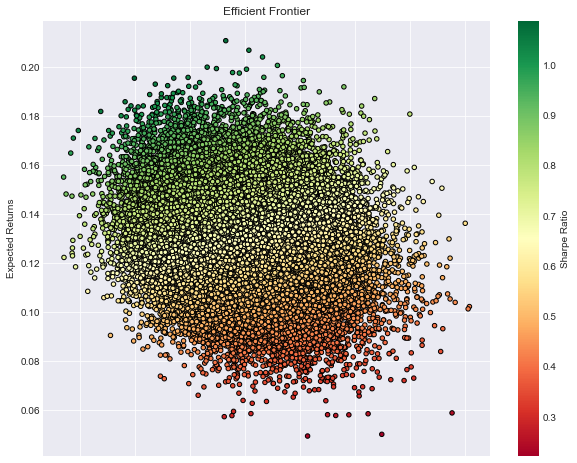

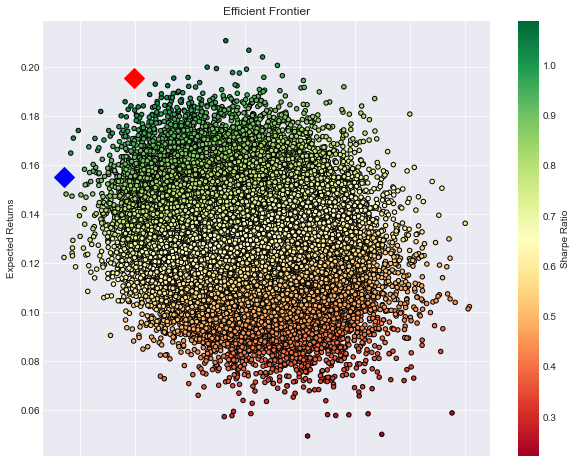

TWO PORTFOLIOS WITH MAX SHARPE RATIO AND MIN VOLATILITY
                  26697
Returns        0.155154
Volatility     0.166984
Sharpe Ratio   0.929153
RCOM.NS        0.066217
BANKINDIA.NS   0.001872
UNIONBANK.NS   0.000303
PCJEWELLER.NS  0.013597
CANBK.NS       0.002184
DELTACORP.NS   0.063871
PNCINFRA.NS    0.003491
GSFC.NS        0.014443
MOIL.NS        0.067534
GRANULES.NS    0.047095
PNB.NS         0.019610
BHEL.NS        0.043336
SBIN.NS        0.016634
BPCL.NS        0.019235
ICICIBANK.NS   0.035577
IDEA.NS        0.059361
BANKBARODA.NS  0.052162
LT.NS          0.052358
ULTRACEMCO.NS  0.004328
RELIANCE.NS    0.015500
ONGC.NS        0.047071
TCS.NS         0.022666
BHARTIARTL.NS  0.039105
SUNPHARMA.NS   0.070494
LUPIN.NS       0.055582
AXISBANK.NS    0.065568
HINDALCO.NS    0.067596
VEDL.NS        0.009070
TECHM.NS       0.009538
M&M.NS         0.014601
                   7807
Returns        0.195524
Volatility     0.179858
Sharpe Ratio   1.087106
RCOM.NS        0.023567
BANKINDI

In [138]:
# get better labels for desired arrangement of columns
#column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
# print the details of the 2 special portfolios

print("TWO PORTFOLIOS WITH MAX SHARPE RATIO AND MIN VOLATILITY")
print(min_variance_port.T)
print(sharpe_portfolio.T)


In [151]:
My_table = pdr.get_data_yahoo(selected,start_time,end_time)


My_table= My_table['Close'] # load all the closing prices this will be retirned as a pandas dataframwe.

My_table = My_table.sort_index(ascending = True) # as the prices are in descending order
# add additional returns coloums to the dataframe one for rach stock and compute returns

#My_table = My_table.dropna(how='all') # drop teh rows if price is zero


# calculate daily and annual returns of the stocks
My_Portfolio_Returns = My_table.pct_change()

My_Portfolio_Returns= My_Portfolio_Returns.fillna(0)
# ###########################COMPUTING KEY PORTFOLIO STATS , ALPHA/ BETA/ DRAWDOWN##

Weights= []
Stockamounts = []
#drop the first three rows , sharpe, returns and volatility
min_sharpe_portfolio = sharpe_portfolio.T[3:]
min_sharpe_portfolio.index.names= ['SYMBOL']
#Betas.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
min_sharpe_portfolio.columns= ['WEIGHT']
## get all the weights for the stocks listed#######################################
for idx, val in enumerate(selected):
    Weights.append(min_sharpe_portfolio.at[val,'WEIGHT'])

for idx, val in enumerate(selected):
    Stockamounts.append(val+"_AMT")
Stockamounts

[*********************100%***********************]  30 of 30 completed


['RCOM.NS_AMT',
 'BANKINDIA.NS_AMT',
 'UNIONBANK.NS_AMT',
 'PCJEWELLER.NS_AMT',
 'CANBK.NS_AMT',
 'DELTACORP.NS_AMT',
 'PNCINFRA.NS_AMT',
 'GSFC.NS_AMT',
 'MOIL.NS_AMT',
 'GRANULES.NS_AMT',
 'PNB.NS_AMT',
 'BHEL.NS_AMT',
 'SBIN.NS_AMT',
 'BPCL.NS_AMT',
 'ICICIBANK.NS_AMT',
 'IDEA.NS_AMT',
 'BANKBARODA.NS_AMT',
 'LT.NS_AMT',
 'ULTRACEMCO.NS_AMT',
 'RELIANCE.NS_AMT',
 'ONGC.NS_AMT',
 'TCS.NS_AMT',
 'BHARTIARTL.NS_AMT',
 'SUNPHARMA.NS_AMT',
 'LUPIN.NS_AMT',
 'AXISBANK.NS_AMT',
 'HINDALCO.NS_AMT',
 'VEDL.NS_AMT',
 'TECHM.NS_AMT',
 'M&M.NS_AMT']

In [165]:
# = [5/10,3/10,2/10] #Nifty allocate teh initial value by each stock.
Amount = 100000000 # 100 million
Allocation_Value = [i * Amount for i in Weights]

#My_Portfolio_Returns = returns_daily
#My_Portfolio_Returns.fillna(0)
numofrows = len(My_Portfolio_Returns)

for id,col_name in enumerate(Stockamounts):# Add portfolio value coloumns and initiatlise to 0
    My_Portfolio_Returns[col_name] = 0                                    


for z in range(0,numofrows):
    if(z==0): #Fiets row will have initial portfolio value
                ### Put a for loop here for looping through the various stocks and initiatising the  values
        for id,col_name in enumerate(Stockamounts):# allocate starting portfolio balance divinde equally for 10 st
            My_Portfolio_Returns[col_name].iloc[z] = Allocation_Value[id]                                    
    else:
        for id,col_name in enumerate(Stockamounts):# compute portfolio value for each stock.Todays returns * yesterdays value
            My_Portfolio_Returns[col_name].iloc[z] = (1+My_Portfolio_Returns[selected[id]].iloc[z])*My_Portfolio_Returns[col_name].iloc[z-1]
                        


My_Portfolio_Returns['Daily_AMT'] = My_Portfolio_Returns.sum(axis=1)

My_Portfolio_Returns['AMT_CHANGE'] = My_Portfolio_Returns['Daily_AMT'].pct_change().fillna(0)

My_Portfolio_Returns

C:\Users\Nikita\AppData\Local\Temp\ipykernel_3564\2692233657.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  My_Portfolio_Returns[col_name].iloc[z] = Allocation_Value[id]


,AXISBANK.NS,BANKBARODA.NS,BANKINDIA.NS,BHARTIARTL.NS,BHEL.NS,BPCL.NS,CANBK.NS,DELTACORP.NS,GRANULES.NS,GSFC.NS,...,BHARTIARTL.NS_AMT,SUNPHARMA.NS_AMT,LUPIN.NS_AMT,AXISBANK.NS_AMT,HINDALCO.NS_AMT,VEDL.NS_AMT,TECHM.NS_AMT,M&M.NS_AMT,Daily_AMT,AMT_CHANGE
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.893839e+06,7.225247e+06,1.128430e+06,5.779712e+06,1.399316e+06,5.187148e+06,434045.452022,417047.887331,2.000000e+08,0.000000
2014-04-03,-0.022015,-0.023158,-0.015270,-0.015805,-0.031032,-0.020826,-0.010983,0.015151,-0.015029,-0.021486,...,3.832297e+06,7.266696e+06,1.151438e+06,5.652469e+06,1.411148e+06,5.224140e+06,429199.802362,419212.212785,1.987730e+08,-0.006135
2014-04-04,-0.004669,-0.001849,0.003661,-0.014032,-0.020550,0.009099,0.002549,-0.018777,0.002419,0.014639,...,3.778523e+06,7.181914e+06,1.149967e+06,5.626075e+06,1.416293e+06,5.209069e+06,429614.465273,415799.240961,1.982036e+08,-0.002864
2014-04-07,-0.004271,-0.007145,-0.007940,0.003953,-0.031880,-0.012399,-0.001453,-0.027969,-0.006868,-0.032462,...,3.793461e+06,7.386645e+06,1.130725e+06,5.602044e+06,1.413206e+06,5.326896e+06,424851.771335,422084.084192,1.990556e+08,0.004298
2014-04-09,0.043529,0.055774,0.039152,0.008348,0.022235,0.004451,0.036734,0.054518,0.008037,0.058714,...,3.825128e+06,7.912917e+06,1.145613e+06,5.845894e+06,1.470310e+06,5.415952e+06,411760.270852,425850.854395,2.032235e+08,0.020938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-22,-0.015390,-0.004794,-0.012066,-0.006217,-0.019868,-0.037037,-0.011836,-0.021855,-0.021485,-0.007803,...,4.966332e+06,6.385599e+06,8.926929e+05,1.020702e+07,2.230674e+06,7.995825e+06,586736.160309,608382.112323,3.549447e+08,-0.011026
2018-03-23,-0.036086,-0.012968,-0.047875,-0.006978,0.000000,-0.003014,-0.038877,-0.023537,-0.014320,-0.037252,...,4.931678e+06,6.310237e+06,8.644468e+05,9.838687e+06,2.120581e+06,7.562878e+06,590811.692781,610088.636340,3.462050e+08,-0.024623
2018-03-26,0.015616,0.062312,0.047204,0.021323,0.010442,0.014754,0.105209,0.013799,0.010654,0.003869,...,5.036836e+06,6.320286e+06,8.710964e+05,9.992324e+06,2.166367e+06,7.762910e+06,588015.726288,621409.676432,3.493690e+08,0.009139


-------------------COMPUTNG MAX DRAWDOWN-----------------------------


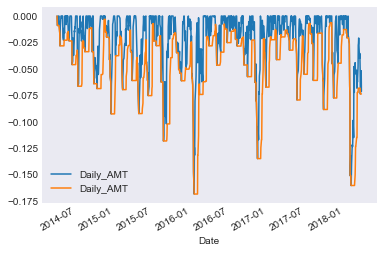

In [177]:
print("-------------------COMPUTNG MAX DRAWDOWN-----------------------------")
Roll_Max = My_Portfolio_Returns['Daily_AMT'].rolling(window= 12, min_periods=1).max()
Daily_Drawdown = My_Portfolio_Returns['Daily_AMT']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window= 12, min_periods=1).min()

# Plot the results
#SPY_Dat['Adj Close'].plot( )
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
plt.legend()
plt.show()

----------------COMPUTING ALPHA AND BETA FOR PORTFOLIO------------
[*********************100%***********************]  1 of 1 completed
PORTFOLIO BETA= 1.1814412468403293 PORTFOLIOALPHA= 0.025817333818950194 PORTFOLIOVOLATILITY= 0.20881582569897286 MOMENTUM= -0.08873957796018006
----------------PORTFOLIO RETURNS----------------------------
----------------PORTFOLIO RETURNS-----ANNUALISED---%--------------------
15.908969973094903
------------PORTFOLIO SHARPE RATIO---------
0.7618661047285343
Annualised Portfolio Shape = 0.7618661047285343


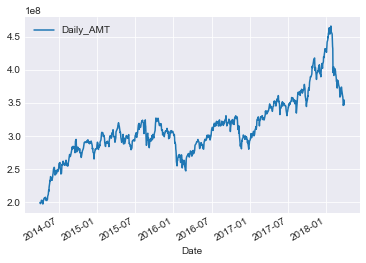

In [178]:
print("----------------COMPUTING ALPHA AND BETA FOR PORTFOLIO------------")
#My_Portfolio_Returns['Daily_AMT'].plot(grid=True)
#plt.legend()

# compute returns
Index = pdr.get_data_yahoo("^NSEI",start_time,end_time)
Index['Rets'] = Index['Close'].pct_change().fillna(0)


#covmat = np.cov(Index['Rets'],My_Portfolio_Returns['AMT_CHANGE'][1:])
My_Portfolio_Returns= My_Portfolio_Returns[My_Portfolio_Returns.index.isin(Index.index)]
covmat = np.cov(My_Portfolio_Returns['AMT_CHANGE'][1:],Index['Rets'][1:])

# calculate measures now

beta = covmat[0,1]/covmat[1,1]      
alpha= np.mean(My_Portfolio_Returns['AMT_CHANGE'])-beta*np.mean(Index['Rets'])

volatility = np.sqrt(covmat[0,0])
momentum = np.prod(1+My_Portfolio_Returns['AMT_CHANGE'].tail(22).values) -1

# annualize the numbers
prd = 252. # used monthly returns; 12 periods to annualize
alpha = alpha*252
volatility = volatility*np.sqrt(prd)

print ("PORTFOLIO BETA=",beta,"PORTFOLIOALPHA=",alpha, "PORTFOLIOVOLATILITY=", volatility,"MOMENTUM=", momentum)

print("----------------PORTFOLIO RETURNS----------------------------")
My_Portfolio_Returns['Daily_AMT'].plot(grid=True)
plt.legend()
Returns = (My_Portfolio_Returns['AMT_CHANGE'].mean()*250)## Annulaise returns

print("----------------PORTFOLIO RETURNS-----ANNUALISED---%--------------------")
print(Returns*100)


print("------------PORTFOLIO SHARPE RATIO---------")
Returns = (My_Portfolio_Returns['AMT_CHANGE'].mean()*250)## Annulaise returns

Sharpe = Returns/ volatility

print(Sharpe)

print("Annualised Portfolio Shape =", Sharpe)